In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
print("Setup Complete")


Setup Complete


# Importing data

In this project I will analyse which countries and how are suffering from terror attacks, as well I will briefly review the most notorious terrorist groups and how they are implementing their actions.

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1")

C:\Users\samit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.rename(columns={'iyear':'Year','country_txt':'Country','region_txt':'Region','success':'Success','attacktype1_txt':'AttackType','targtype1_txt':'TargetType','natlty1_txt':'TargetNationality','gname':'Group','weaptype1_txt':'WeaponType','nkill':'Killed','nwound':'Wounded'},inplace=True)
#renaming some of the columns which later I will be using

In [4]:
col = ['Year','Country','Region','Group','Success','AttackType','TargetType','TargetNationality','WeaponType','Killed','Wounded']
df_proc = df[~df.Killed.isna()][col].reset_index(drop=True)
df_proc.head()
#selecting only relevant columns

,Year,Country,Region,Group,Success,AttackType,TargetType,TargetNationality,WeaponType,Killed,Wounded
0,1970,Dominican Republic,Central America & Caribbean,MANO-D,1,Assassination,Private Citizens & Property,Dominican Republic,Unknown,1.0,0.0
1,1970,Mexico,North America,23rd of September Communist League,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,Unknown,0.0,0.0
2,1970,Philippines,Southeast Asia,Unknown,1,Assassination,Journalists & Media,United States,Unknown,1.0,0.0
3,1970,United States,North America,Black Nationalists,1,Armed Assault,Police,United States,Firearms,0.0,0.0
4,1970,Uruguay,South America,Tupamaros (Uruguay),0,Assassination,Police,Uruguay,Firearms,0.0,0.0


# Success of attacks

<ipython-input-5-4871706c9a86>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, labels=labels, explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=200)


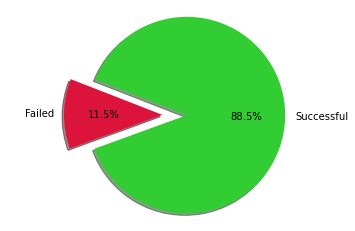

In [5]:
suc = df_proc['Success'].value_counts()
labels = 'Successful', 'Failed'
sizes = [suc]
colors = ['limegreen', 'crimson']
explode = (0.25, 0)
plt.pie(sizes, labels=labels, explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.savefig("success.svg")
plt.show()


In [6]:
df_proc['Decade'] = pd.cut(df_proc['Year'], bins=[1969, 1980, 1990, 2000, 2010, 2020], labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2017'])
df_proc.head(3)
#splitting years into decades 

,Year,Country,Region,Group,Success,AttackType,TargetType,TargetNationality,WeaponType,Killed,Wounded,Decade
0,1970,Dominican Republic,Central America & Caribbean,MANO-D,1,Assassination,Private Citizens & Property,Dominican Republic,Unknown,1.0,0.0,1970-1980
1,1970,Mexico,North America,23rd of September Communist League,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,Unknown,0.0,0.0,1970-1980
2,1970,Philippines,Southeast Asia,Unknown,1,Assassination,Journalists & Media,United States,Unknown,1.0,0.0,1970-1980


<ipython-input-7-15d987fe740b>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,labels=dec.index,colors=colors,autopct='%1.1f%%', startangle=180)


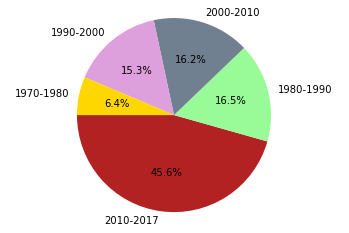

In [7]:
dec = df_proc['Decade'].value_counts()
sizes = [dec]
colors= 'firebrick','palegreen','slategray','plum','gold'
plt.pie(sizes,labels=dec.index,colors=colors,autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.savefig("bydecades.svg")
plt.show()
#attacks splitted into decades

# Countries with most victims



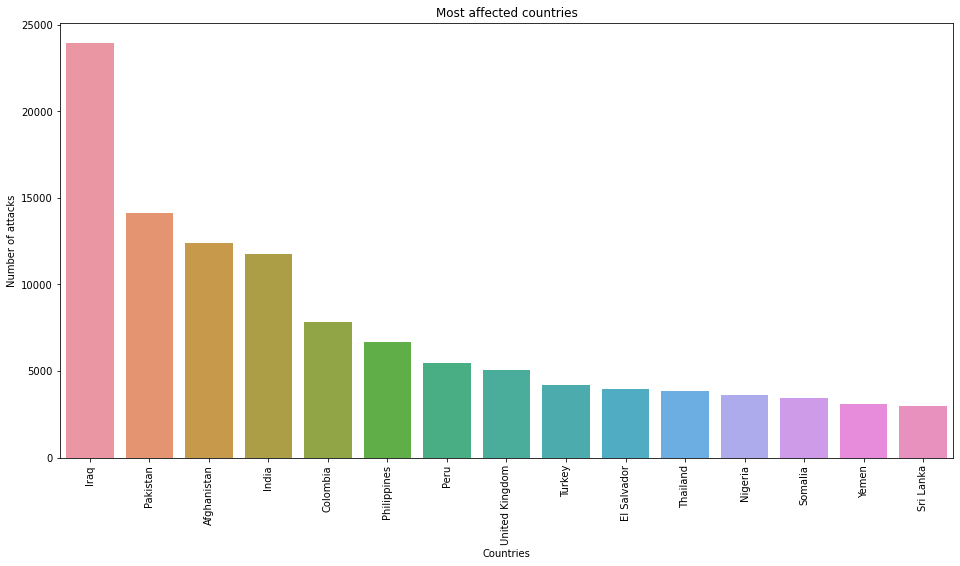

In [8]:
figsize(16,8)
sns.barplot(df_proc['Country'].value_counts()[:15].index,df_proc['Country'].value_counts()[:15].values)
plt.xlabel('Countries')
plt.title('Most affected countries')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 90)
plt.savefig("mostaffected.svg")
plt.show()

# 10 biggest attacks in History

In [9]:
big = df_proc.groupby(['Killed'])['Group','Country','Year','TargetType'].max().sort_values(by='Killed',ascending=False).iloc[0:10]
big

<ipython-input-9-c0605393d9cc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  big = df_proc.groupby(['Killed'])['Group','Country','Year','TargetType'].max().sort_values(by='Killed',ascending=False).iloc[0:10]


,Group,Country,Year,TargetType
Killed,,,,
1570.0,Islamic State of Iraq and the Levant (ISIL),Iraq,2014,Military
1384.0,Al-Qaida,United States,2001,Private Citizens & Property
1383.0,Al-Qaida,United States,2001,Private Citizens & Property
1180.0,Hutu extremists,Rwanda,1994,Private Citizens & Property
953.0,Islamic State of Iraq and the Levant (ISIL),Iraq,2014,Private Citizens & Property
670.0,Islamic State of Iraq and the Levant (ISIL),Iraq,2014,Police
588.0,Al-Shabaab,Somalia,2017,Business
518.0,Communist Party of Nepal- Maoist (CPN-M),Nepal,2004,Government (General)
517.0,Islamic State of Iraq and the Levant (ISIL),Syria,2014,Military


# 10 Terrorist groups with most killings

In [10]:
grp = df_proc.groupby(['Group'])['Killed'].sum().sort_values(ascending=False).iloc[1:11] #idx 0 is unknown
grp

Group
Islamic State of Iraq and the Levant (ISIL)         38923.0
Taliban                                             29410.0
Boko Haram                                          20328.0
Shining Path (SL)                                   11601.0
Liberation Tigers of Tamil Eelam (LTTE)             10989.0
Al-Shabaab                                           9330.0
Farabundo Marti National Liberation Front (FMLN)     8065.0
Nicaraguan Democratic Force (FDN)                    6662.0
Tehrik-i-Taliban Pakistan (TTP)                      6042.0
Revolutionary Armed Forces of Colombia (FARC)        5661.0
Name: Killed, dtype: float64

In [11]:
df_group10 = df_proc[df_proc.Group.isin(['Islamic State of Iraq and the Levant (ISIL)','Taliban','Boko Haram','Shining Path (SL)','Liberation Tigers of Tamil Eelam (LTTE)','Al-Shabaab','Farabundo Marti National Liberation Front (FMLN)','Nicaraguan Democratic Force (FDN)','Tehrik-i-Taliban Pakistan (TTP)','Revolutionary Armed Forces of Colombia (FARC)'])]
df_group10
# selecting 10 biggest terrorist groups and adding it to new df

,Year,Country,Region,Group,Success,AttackType,TargetType,TargetNationality,WeaponType,Killed,Wounded,Decade
2607,1975,Colombia,South America,Revolutionary Armed Forces of Colombia (FARC),1,Armed Assault,Private Citizens & Property,Colombia,Firearms,2.0,NaN,1970-1980
2777,1975,Sri Lanka,South Asia,Liberation Tigers of Tamil Eelam (LTTE),1,Assassination,Government (General),Sri Lanka,Firearms,1.0,0.0,1970-1980
3097,1976,Colombia,South America,Revolutionary Armed Forces of Colombia (FARC),1,Hostage Taking (Kidnapping),Business,Colombia,Unknown,0.0,0.0,1970-1980
3678,1976,Colombia,South America,Revolutionary Armed Forces of Colombia (FARC),1,Hostage Taking (Kidnapping),Business,United States,Unknown,0.0,0.0,1970-1980
3954,1977,Colombia,South America,Revolutionary Armed Forces of Colombia (FARC),1,Armed Assault,Government (Diplomatic),Paraguay,Firearms,0.0,0.0,1970-1980
...,...,...,...,...,...,...,...,...,...,...,...,...
171363,2017,Afghanistan,South Asia,Taliban,1,Bombing/Explosion,Police,Afghanistan,Explosives,5.0,0.0,2010-2017
171366,2017,Iraq,Middle East & North Africa,Islamic State of Iraq and the Levant (ISIL),0,Armed Assault,Military,Iraq,Firearms,13.0,0.0,2010-2017
171367,2017,Somalia,Sub-Saharan Africa,Al-Shabaab,1,Bombing/Explosion,Military,International,Explosives,0.0,0.0,2010-2017
171370,2017,Afghanistan,South Asia,Taliban,1,Armed Assault,Terrorists/Non-State Militia,Afghanistan,Firearms,6.0,0.0,2010-2017


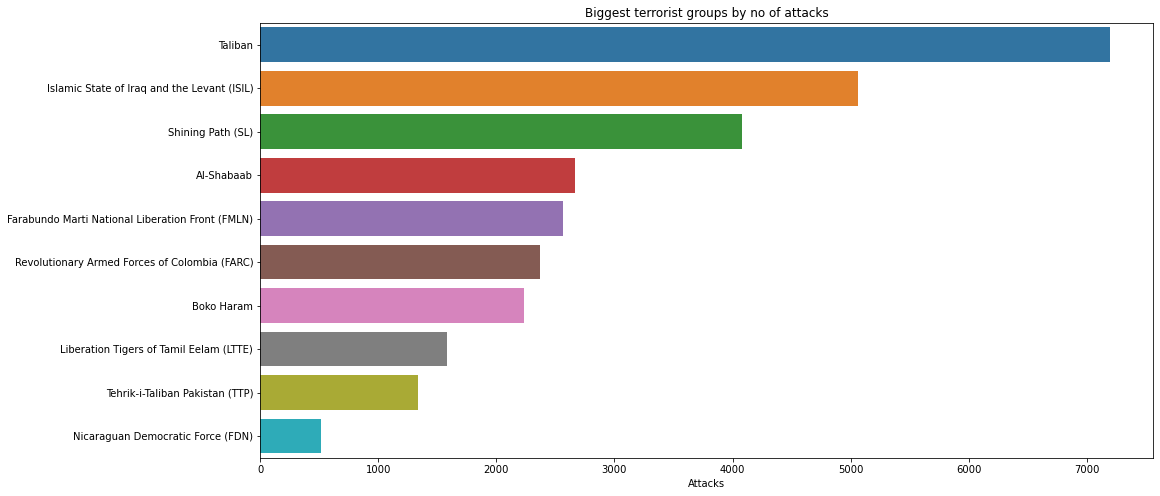

In [12]:
figsize(16,8)
sns.barplot(df_group10['Group'].value_counts(),df_group10['Group'].value_counts().index) 
plt.xlabel("Attacks")
plt.title("Biggest terrorist groups by no of attacks")
plt.savefig("biggestgroups.svg")
plt.show()

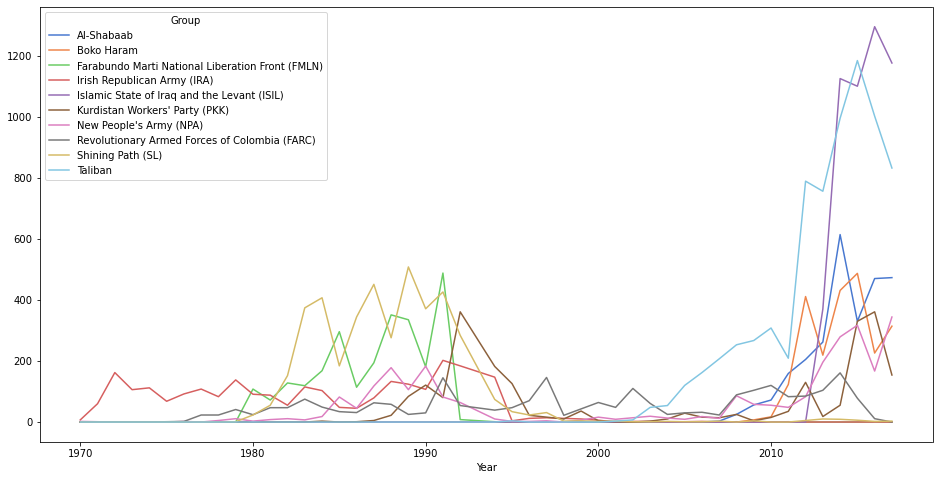

In [13]:
figsize(16,8)
top=df_proc[df_proc['Group'].isin(df_proc['Group'].value_counts()[1:11].index)] #idx 0 is unknown
pd.crosstab(top.Year,top.Group).plot(color=sns.color_palette("muted"))
plt.savefig("biggestgroupsbyyears.svg")

# Attack and weapon types against target groups

In [14]:
attack = df_proc.pivot_table(columns='AttackType', values=('Killed','Wounded'), aggfunc='sum')
attack

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0
Wounded,76993.0,13854.0,371743.0,3711.0,16996.0,3940.0,6134.0,13995.0,14252.0


In [15]:
weap = df_proc.pivot_table(columns='WeaponType', values=('Killed','Wounded'), aggfunc='sum')
weap

WeaponType,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
Killed,9.0,624.0,174277.0,1.0,174894.0,5476.0,10575.0,123.0,2.0,83.0,42620.0,3184.0
Wounded,805.0,13825.0,384961.0,0.0,76737.0,5433.0,5313.0,105.0,4.0,286.0,17028.0,17121.0


In [16]:
df_proc['TargetType'].value_counts()

Private Citizens & Property       41080
Military                          25637
Police                            23748
Government (General)              20354
Business                          19186
Transportation                     6403
Unknown                            5803
Utilities                          5378
Religious Figures/Institutions     4307
Educational Institution            4143
Government (Diplomatic)            3403
Terrorists/Non-State Militia       2943
Journalists & Media                2725
Violent Political Party            1803
Airports & Aircraft                1233
Telecommunication                   941
NGO                                 906
Tourists                            421
Maritime                            299
Food or Water Supply                278
Abortion Related                    259
Other                               128
Name: TargetType, dtype: int64

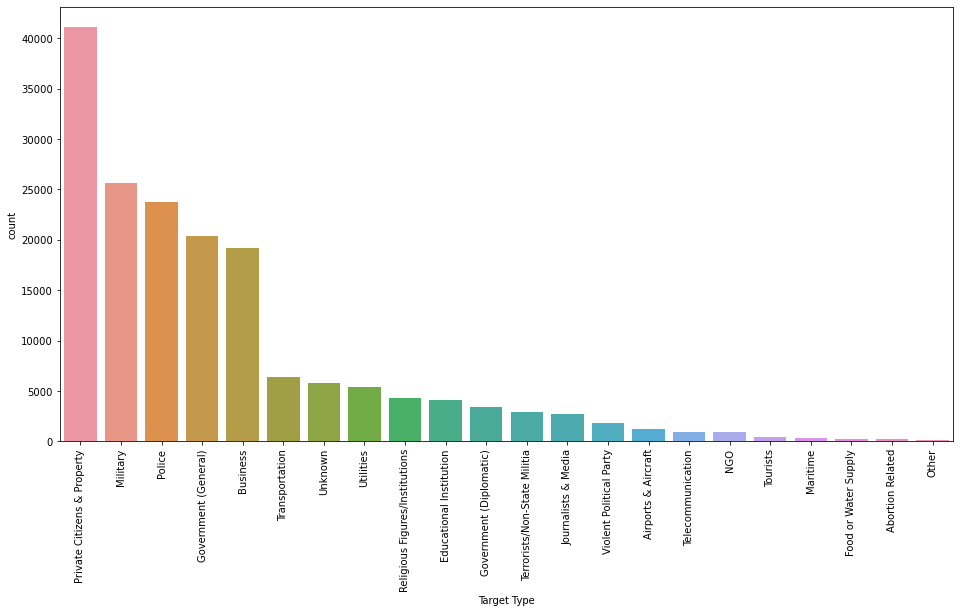

In [17]:
figsize(16,8)
sns.countplot('TargetType',order=df_proc['TargetType'].value_counts().index,data=df_proc)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.savefig("targettypes.svg")
plt.show()


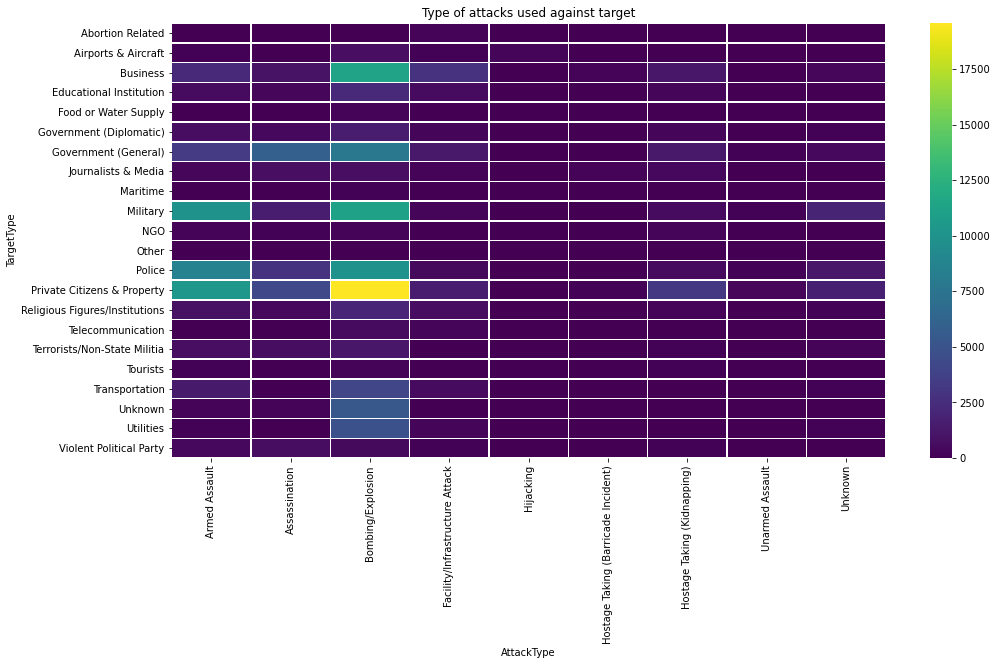

In [18]:
figsize(16,8)
target=pd.crosstab(df_proc.TargetType,df_proc.AttackType)
sns.heatmap(target,linewidths=.5, cmap='viridis').set_title('Type of attacks used against target')
plt.savefig("attacksvstargets.svg")

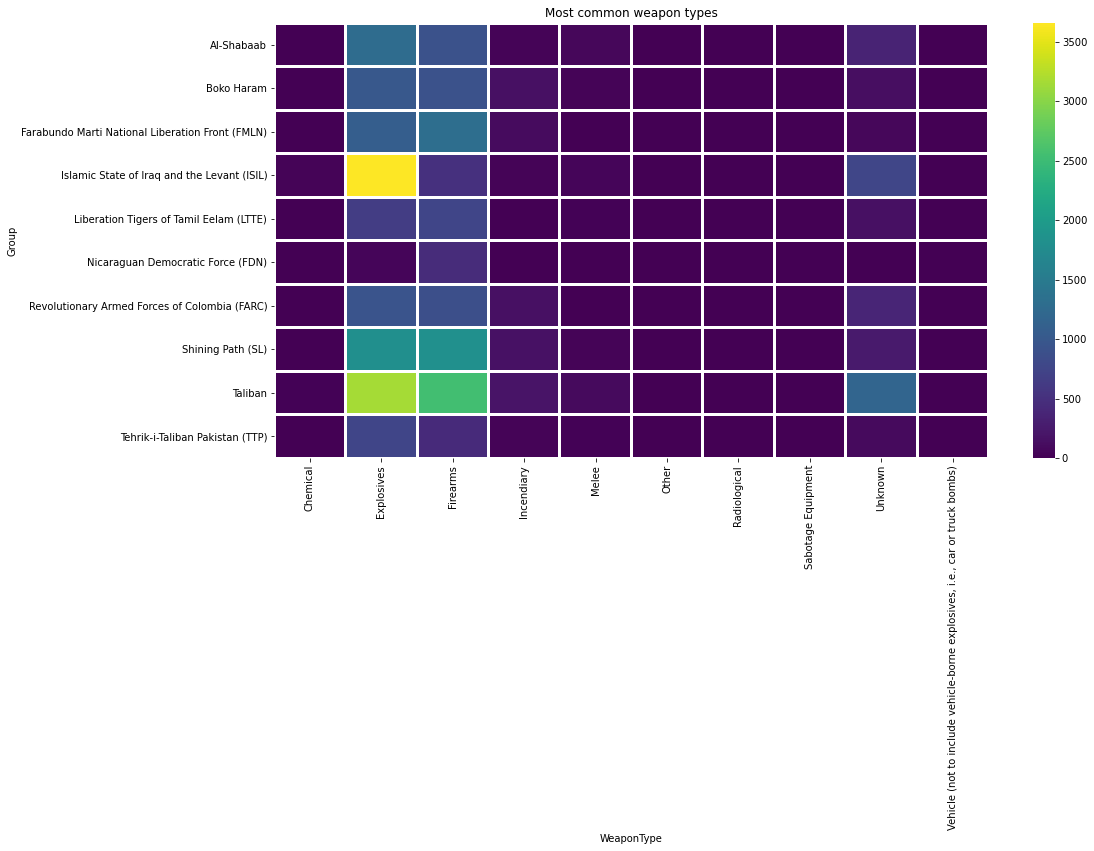

In [19]:
figsize(16,8)
groupweap=pd.crosstab(df_group10.Group,df_proc.WeaponType)
sns.heatmap(groupweap,linewidths=2, cmap='viridis').set_title('Most common weapon types')
plt.savefig("groupswithweapons.svg")

* Most affected country: Iraq.
* Biggest terrorist group: Taliban
* Decade with most attacks: 2010-2017
* Often used weapons by most notorious groups: Explosives, Firearms
* Most vulnerable targets : Private citizens and Property, Police, Military.
